# Linear regression
<img src="data/images/linear_regression.png" alt="xxx" title="title" width=260 height=260 />

Is a form of predictive technique, used in trends, estimates, impact of price changes <br>
$$y = mx + c$$
- m = slope of the line
- c = intercept of the line
$$ m = \frac{∑(x - x̄)(y - ӯ)}{∑(x - x̄)^2}$$
The error (better when closer to 1): <br>
$$ R^2 = \frac{∑(y_{pred} - ӯ)}{∑(y - ӯ)^2}$$

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [4]:
# Reading data
data = pd.read_csv('data/my_data.txt')
data

,X,Y
0,1,2
1,2,5
2,3,7
3,4,2
4,5,7
5,6,8


In [5]:
# Collect X and Y
X = data["X"].values
Y = data["Y"].values
X, Y

(array([1, 2, 3, 4, 5, 6], dtype=int64),
 array([2, 5, 7, 2, 7, 8], dtype=int64))

In [6]:
# Mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
mean_x, mean_y

(3.5, 5.166666666666667)

In [7]:
# Total number of values
m = len(X)
m

6

In [8]:
# Using the formula to calculate b1 and b2
up = 0
down = 0
for i in range(m):
    up += (X[i] - mean_x) * (Y[i] - mean_y)
    down += (X[i] - mean_x) ** 2
b1 = up/down
b0 = mean_y - (b1 * mean_x)
b1, b0

(0.8857142857142857, 2.0666666666666673)

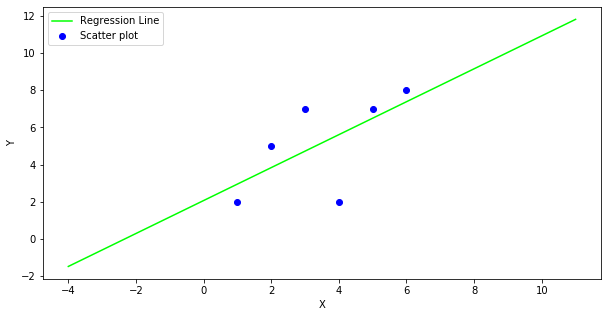

In [9]:
# Plotting

max_x = np.max(X) + 5
min_x = np.min(X) - 5

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting line
plt.plot(x, y, color='#00ff00', label='Regression Line')
# Ploting scatter points
plt.scatter(X, Y, color='#0000ff', label='Scatter plot')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [10]:
# The error
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
r2

0.39412166780587854

In [11]:
# Using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# You cannot use Rank1 matrix in sklearn
X = X.reshape((m, 1))
# Creating the model
reg = LinearRegression()
# Fitting the training data
reg = reg.fit(X, Y)
# Y prediction
Y_pred = reg.predict(X)
# Calculating the error
r2 = reg.score(X, Y)
print(r2)

0.39412166780587843
